<a href="https://colab.research.google.com/github/arbiterFF/Finance/blob/main/Optimal_Portfolio_Efficient_Frontier_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  14 of 14 completed
Minimum weight for each stock: 0.0143
Best portfolio weights:
BHP.AX: 0.0430
BXB.AX: 0.0871
CSL.AX: 0.1137
MQG.AX: 0.0233
NAB.AX: 0.0408
RIO.AX: 0.0243
RMD.AX: 0.0390
SHL.AX: 0.0680
TCL.AX: 0.1413
WDS.AX: 0.1146
WTC.AX: 0.0177
TNE.AX: 0.1280
TLX.AX: 0.0155
APA.AX: 0.1437
Highest Sharpe ratio: 3.4867267683086784


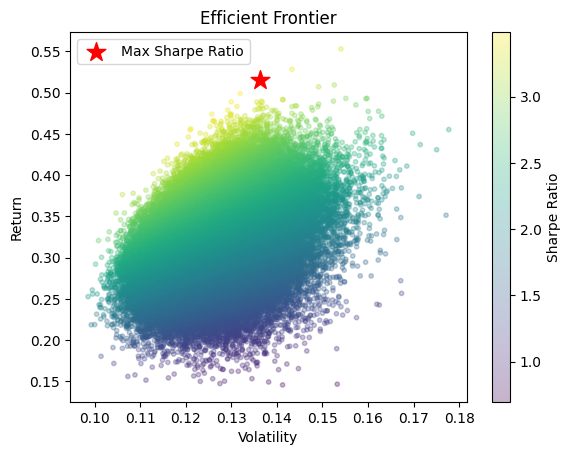

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the stocks in your portfolio
stocks = ['BHP.AX', 'BXB.AX', 'CSL.AX', 'MQG.AX', 'NAB.AX', 'RIO.AX', 'RMD.AX', 'SHL.AX', 'TCL.AX', 'WDS.AX', 'WTC.AX', 'TNE.AX', 'TLX.AX', 'APA.AX','TLS.AX']

# Set the time period
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=90)

# Fetch the stock price data
price_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
price_data = price_data.reindex(sorted(price_data.columns), axis=1)

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Set the risk-free rate
risk_free_rate = 0.04

# Initialize variables to store the best portfolio weights and highest Sharpe ratio
best_weights = None
highest_sharpe = -np.inf

# Set the number of random portfolios to generate
num_portfolios = 100000

# Initialize arrays to store portfolio returns, volatilities, and Sharpe ratios
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatilities = np.zeros(num_portfolios)
sharpe_ratios = np.zeros(num_portfolios)

# Set the minimum weight for each stock
min_weight = 0.2/len(stocks)
print(f"Minimum weight for each stock: {min_weight:.4f}")
# Generate random portfolios
for i in range(num_portfolios):
    # Generate random portfolio weights with minimum weight constraint
    weights = np.random.random(len(stocks))
    weights = min_weight + (1 - len(stocks) * min_weight) * (weights / np.sum(weights))

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)) * 252)

    # Calculate Sharpe ratio
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Update the best portfolio weights and highest Sharpe ratio if necessary
    if sharpe_ratio > highest_sharpe:
        best_weights = weights
        highest_sharpe = sharpe_ratio

    # Store portfolio returns, volatilities, and Sharpe ratios
    portfolio_returns[i] = portfolio_return
    portfolio_volatilities[i] = portfolio_volatility
    sharpe_ratios[i] = sharpe_ratio

# Print the best portfolio weights and highest Sharpe ratio
print("Best portfolio weights:")
for stock, weight in zip(stocks, best_weights):
    print(f"{stock}: {weight:.4f}")
print("Highest Sharpe ratio:", highest_sharpe)

# Plot the efficient frontier
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.scatter(portfolio_volatilities[np.argmax(sharpe_ratios)], portfolio_returns[np.argmax(sharpe_ratios)], c='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()
